In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Linear Regression

In [ ]:
exp_data = pd.read_csv('./sample_data/spring.csv')
exp_data

,Displacement,Force
0,11.5,0.0
1,14.7,0.1
2,18.0,0.2
3,21.3,0.3
4,24.5,0.4
5,27.6,0.5


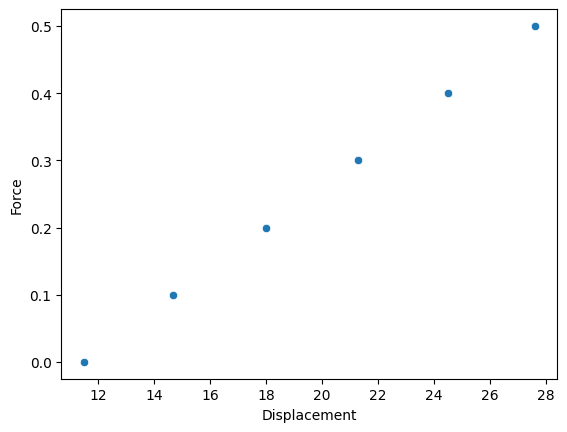

In [ ]:
sns.scatterplot(data=exp_data, x='Displacement', y='Force')
plt.show()

In [ ]:
## Build a simple model

def model(displacement):
  ## design your model here
  f= .01*(displacement - 11.5)

  return f

In [ ]:
exp_data['Model_Prediction'] = exp_data.Displacement.apply(model)
exp_data

,Displacement,Force,Model_Prediction
0,11.5,0.0,0.000
1,14.7,0.1,0.032
2,18.0,0.2,0.065
3,21.3,0.3,0.098
4,24.5,0.4,0.130
5,27.6,0.5,0.161


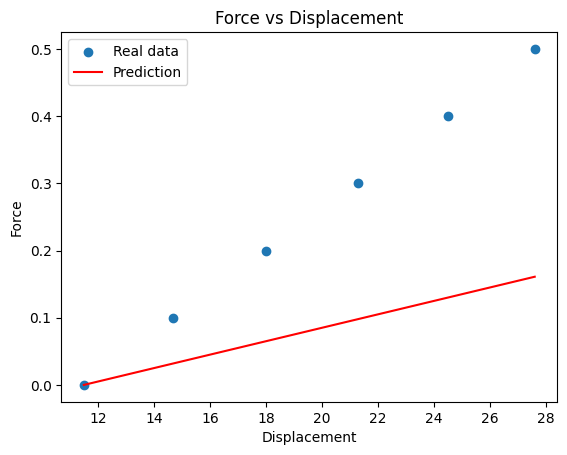

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='Displacement', ylabel='Force', title='Force vs Displacement')

plt.scatter(exp_data.Displacement, exp_data.Force, label='Real data')
plt.plot(exp_data.Displacement, exp_data.Model_Prediction, label='Prediction', c='r')
plt.legend(loc=0)
plt.show()

In [ ]:
## Calculate the distance between the prediction and the real data  => Loss

def dist(Y, Y_pred):

  d = np.sum(np.abs( Y - Y_pred ))  ## replace this with what you think is good for the loss

  return d

## now calculate the distance between your prediction and the actual force.
dist( exp_data.Force , exp_data.Model_Prediction )

1.014

In [ ]:
'''
Parametric Model:
Here I make a model that has some parameters that we can play with.
'''

def model(displacement, w=0):
  ## Let's make a linear model with 0 interception.
  f = w * (displacement -11.5)

  return f

In [ ]:
## Let's see what the predictions are:
exp_data['Model_Prediction'] = exp_data.Displacement.apply(lambda x: model(x, .01))
exp_data

,Displacement,Force,Model_Prediction
0,11.5,0.0,0.000
1,14.7,0.1,0.032
2,18.0,0.2,0.065
3,21.3,0.3,0.098
4,24.5,0.4,0.130
5,27.6,0.5,0.161


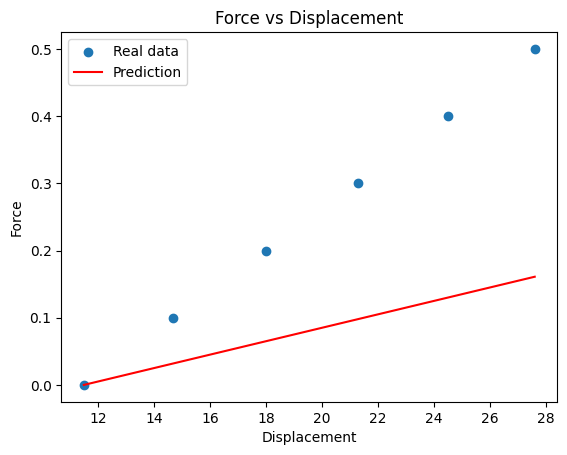

The distance between prediction and real data is 1.014.


In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='Displacement', ylabel='Force', title='Force vs Displacement')

plt.scatter(exp_data.Displacement, exp_data.Force, label='Real data')
plt.plot(exp_data.Displacement, exp_data.Model_Prediction, label='Prediction',c='r')
plt.legend(loc=0)
plt.show()
print(f'The distance between prediction and real data is {dist( exp_data.Force , exp_data.Model_Prediction )   }.')

In [ ]:
# let's play with the parameter and find a good model!
from ipywidgets import interact, FloatSlider

def plot_both(w):
  exp_data['Model_Prediction'] = exp_data.Displacement.apply(lambda x: model(x, w))

  fig = plt.figure()
  ax = fig.add_subplot(111, xlabel='Displacement', ylabel='Force', title='Force vs Displacement')

  plt.scatter(exp_data.Displacement, exp_data.Force, label='Real data')
  plt.plot(exp_data.Displacement, exp_data.Model_Prediction, label='Prediction', c='r')
  plt.legend(loc=0)
  plt.close(fig)
  return fig

interact(plot_both, w=FloatSlider(min=0.0, max=.07, step=.0001, value=0.01))

interactive(children=(FloatSlider(value=0.01, description='w', max=0.07, step=0.0001), Output()), _dom_classes…

<function __main__.plot_both(w)>

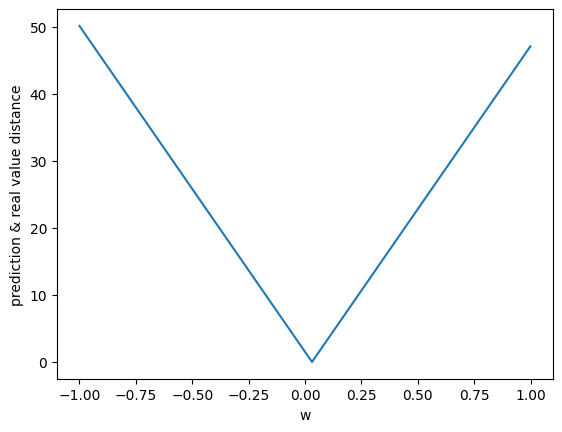

In [ ]:
# Plot distance vs param
dparam = .001
dist_list = [dist(exp_data.Force, model(exp_data.Displacement, p)) for p in np.arange(-1,1,dparam)]
plt.xlabel("w")
plt.ylabel("prediction & real value distance")
plt.plot(np.arange(-1, 1, dparam), dist_list)
plt.show()

In [ ]:
print(f'The optimal value for w seems to be around {np.arange(-1, 1, .001)[np.argmin(dist_list)]}')
print(f'For this value of w, the loss is {dist(exp_data.Force, model(exp_data.Displacement, 0.0141))}')

The optimal value for w seems to be around 0.031000000000001027
For this value of w, the loss is 0.81474


In [ ]:
# Two parameter model:
def model(displacement, w=0, b=0):
  f = w * displacement + b

  return f

In [ ]:
# Let's see what the predictions are:
exp_data['Model_Prediction'] = exp_data.Displacement.apply(lambda x: model(x, .01, .1))
exp_data

,Displacement,Force,Model_Prediction
0,11.5,0.0,0.215
1,14.7,0.1,0.247
2,18.0,0.2,0.280
3,21.3,0.3,0.313
4,24.5,0.4,0.345
5,27.6,0.5,0.376


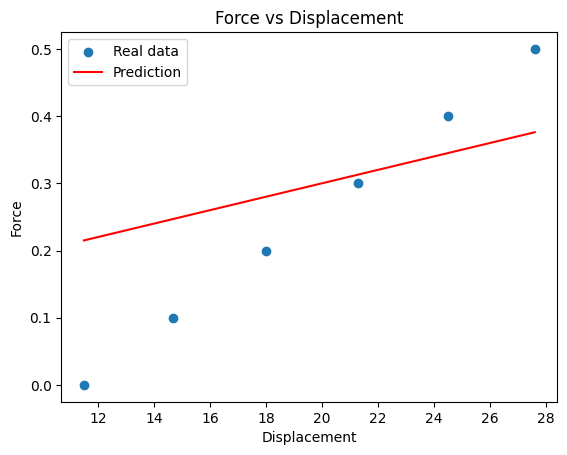

The distance between prediction and real data is 0.6340000000000001.


In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='Displacement', ylabel='Force', title='Force vs Displacement')

plt.scatter(exp_data.Displacement, exp_data.Force, label='Real data')
plt.plot(exp_data.Displacement, exp_data.Model_Prediction, label='Prediction', c='r')
plt.legend(loc=0)
plt.show()
print(f'The distance between prediction and real data is {dist(exp_data.Force, exp_data.Model_Prediction )}.')

In [ ]:
from ipywidgets import interact, FloatSlider

def plot_both(w,b):
  exp_data['Model_Prediction'] = exp_data.Displacement.apply(lambda x: model(x, w,b))

  fig = plt.figure()
  ax = fig.add_subplot(111, xlabel='Displacement', ylabel='Force', title='Force vs Displacement')

  plt.scatter(exp_data.Displacement, exp_data.Force, label='Real data')
  plt.plot(exp_data.Displacement, exp_data.Model_Prediction, label='Prediction', c='r')
  plt.legend(loc=0)
  plt.close(fig)
  return fig

interact(plot_both, w=FloatSlider(min=0.0, max=.05, step=.0001, value=0),
         b=FloatSlider(min=-1, max=1.0, step=.0001, value=0))

interactive(children=(FloatSlider(value=0.0, description='w', max=0.05, step=0.0001), FloatSlider(value=0.0, d…

<function __main__.plot_both(w, b)>

The index for the optimal values are (13, 66)
The optimal values are (0.03, -0.34)
The min loss values is 0.0240


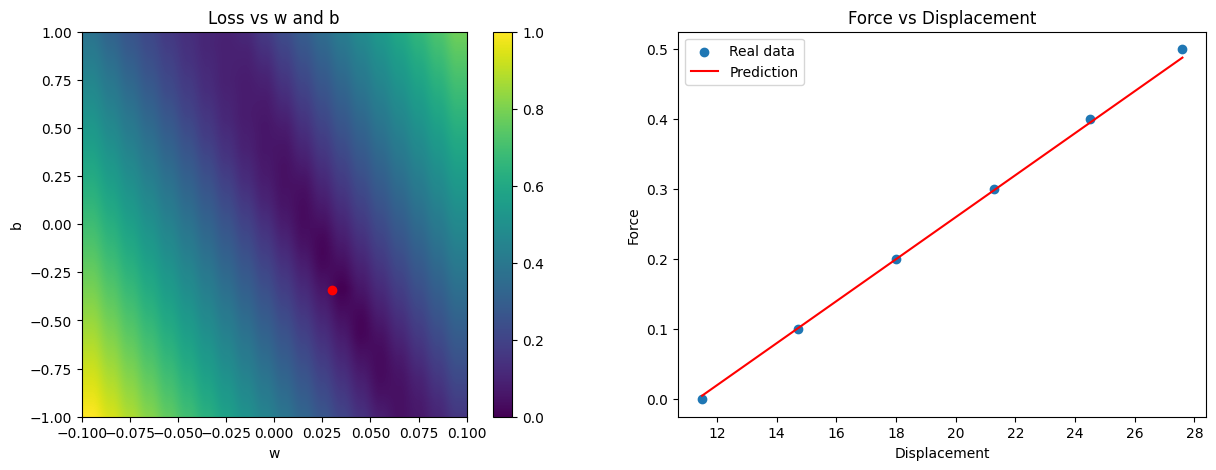

In [ ]:
## Plot distance vs param
dist_list = np.array([[dist(exp_data.Force,
                   model(exp_data.Displacement, w, b) ) for w in np.arange(-.1, .1, .01)] for b in np.arange(-1, 1, .01)])

## The index for the optimal values are:
opt_ind = np.unravel_index(np.argmin(dist_list), dist_list.shape)
print(f'The index for the optimal values are {opt_ind[::-1]}')

## The optimal values are :
opt_param = np.round(np.arange(-.1, .1, .01)[opt_ind[1]], 3), np.round(np.arange(-1, 1, .01)[opt_ind[0]], 3)
print(f'The optimal values are {opt_param}')

# The min loss values is :
print(f'The min loss values is {dist_list[opt_ind]:.4f}')


fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(121, xlabel='w', ylabel='b', title='Loss vs w and b')

plt.imshow(dist_list, extent=[-.1, .1, -1, 1], aspect=.10, origin='lower')
plt.scatter(*opt_param, c='r')
plt.colorbar()

ax = fig.add_subplot(122, xlabel='Displacement', ylabel='Force', title='Force vs Displacement')
plt.scatter(exp_data.Displacement, exp_data.Force, label='Real data')
plt.plot(exp_data.Displacement, model(exp_data.Displacement , opt_param[0], opt_param[1]) , label='Prediction', c='r')
plt.legend(loc=0)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

'''
We first train an estimator which  finds a good fit to the data.
'''

reg = LinearRegression()  ## Defines/Constructs the estimator
reg.fit(exp_data.Displacement.values.reshape(-1, 1), exp_data.Force)  ##Trains the estimator

LinearRegression()

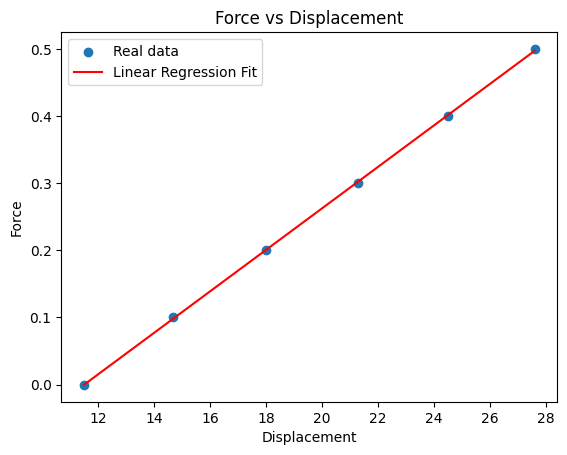

In [ ]:
# Now we plot The model found by sklearn.

fig = plt.figure()
ax = fig.add_subplot(111, xlabel='Displacement', ylabel='Force', title='Force vs Displacement')

plt.scatter(exp_data.Displacement, exp_data.Force, label='Real data')
ax.plot(exp_data.Displacement, reg.predict(exp_data.Displacement.values.reshape(-1, 1)),
        label='Linear Regression Fit', c='r')
plt.legend(loc=0)
plt.show()

In [ ]:
print(f'The optimal w is {reg.coef_[0]:.4f} and the optimal b is {reg.intercept_:.4f}')
print('This is in reasonable agreement with the ones we got')

The optimal w is 0.0309 and the optimal b is -0.3559
This is in reasonable agreement with the ones we got


# Polynomial Regression

In [ ]:
x_rg = np.array([1, 2, 3]).reshape(-1, 1)

y_rg = np.array([1, 1.5, 3]).reshape(-1, 1)

# Find [w,b] such that X.w = Y

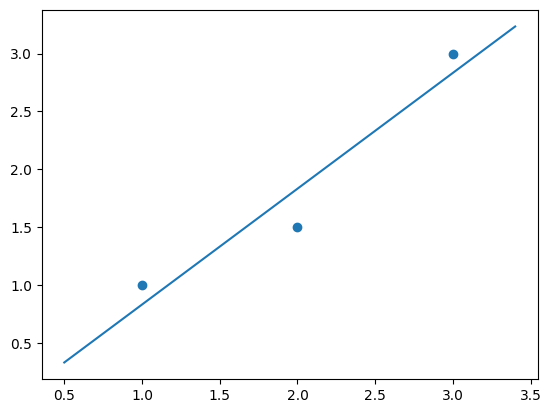

In [ ]:
# We add a column to x for the x^0 which is to determine the intercept.
x_rg = np.hstack([x_rg, x_rg**0])

# Construct m as X^T.X
m = np.dot(x_rg.T, x_rg)

# It is inversible.
np.dot(np.linalg.inv(m), m)

w = np.dot(np.linalg.inv(m), np.dot(x_rg.T, y_rg))

x_range = np.arange(0.5, 3.5, .1)
y_rg_list = w[0] * x_range + w[1]

plt.scatter(x_rg[:, 0], y_rg)
plt.plot(x_range, y_rg_list)
plt.show()

In [ ]:
def poly_features(x, deg):
    return np.hstack([x**(deg-d) for d in np.arange(deg+1)])

poly_features(x_rg, 2)

array([[1, 1, 1, 1, 1, 1],
       [4, 1, 2, 1, 1, 1],
       [9, 1, 3, 1, 1, 1]])

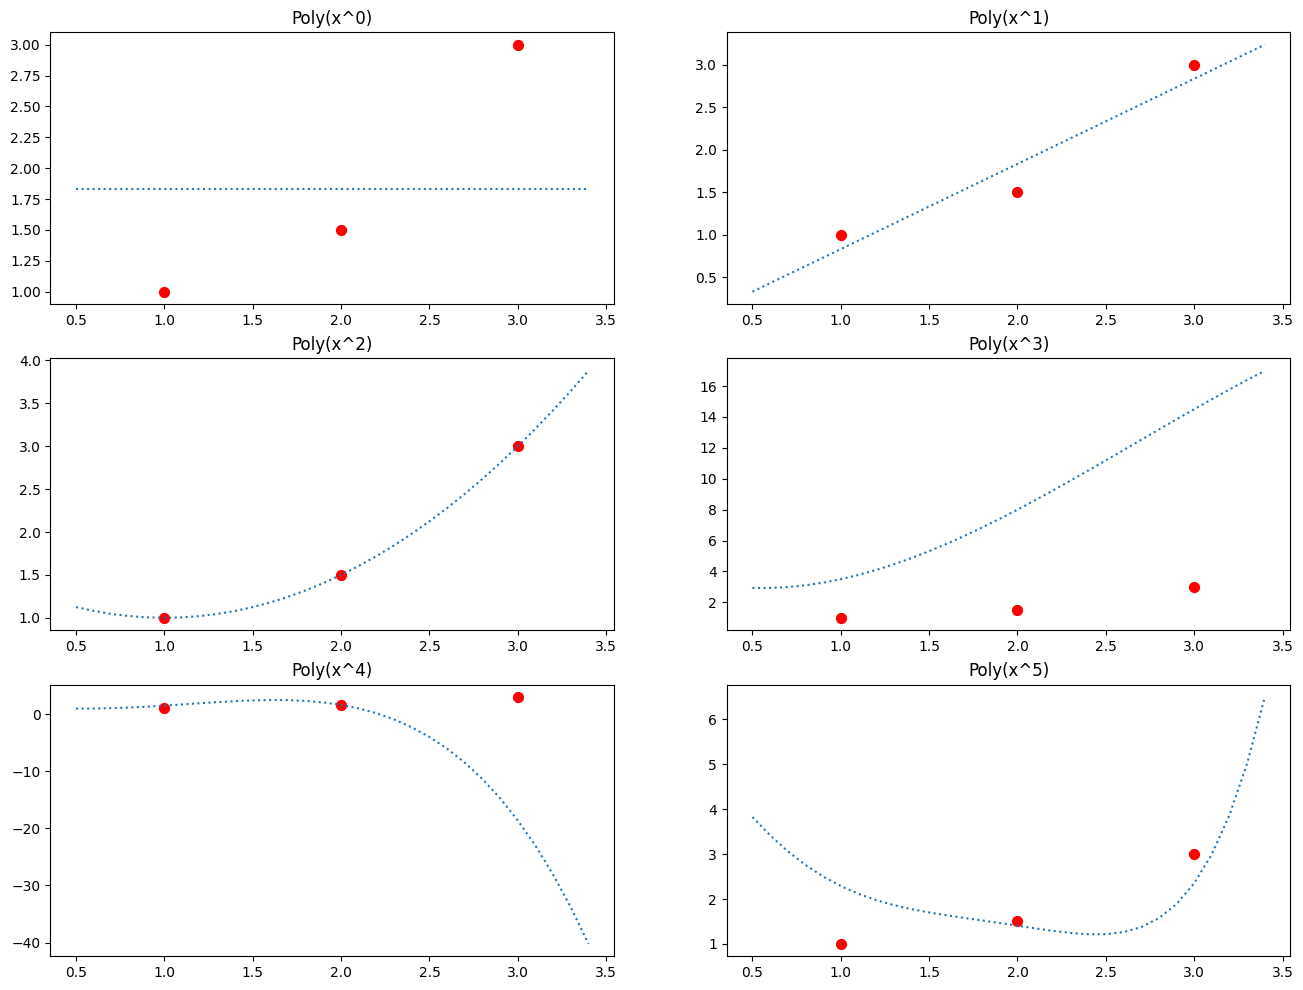

In [ ]:
'''
Now let's try higher orders.
How high can ve go.
'''
x_rg = np.array([1, 2, 3]).reshape(-1, 1)
y_rg = np.array([1, 1.5, 3]).reshape(-1, 1)

# for the plot
x_range = np.arange(0.5, 3.5, .1).reshape(-1, 1)
fig = plt.figure(figsize=(16, 12))

for deg in range(6):

    ## Make the X matrix with powers of the x
    x_rg_in = poly_features(x_rg, deg)

    ## Construct m as X^T.X
    m = np.dot(x_rg_in.T, x_rg_in)

    ## This gives the w
    w = np.dot(np.linalg.inv(m), np.dot(x_rg_in.T, y_rg))

    ## Add the plot
    y_rg_list = np.dot(poly_features(x_range, deg), w)

    ax = fig.add_subplot(3, 2, deg+1,  title=f'Poly(x^{deg})')
    ax.scatter(x_rg, y_rg, s=50, c ='r')
    ax.plot(x_range, y_rg_list, ls='dotted')

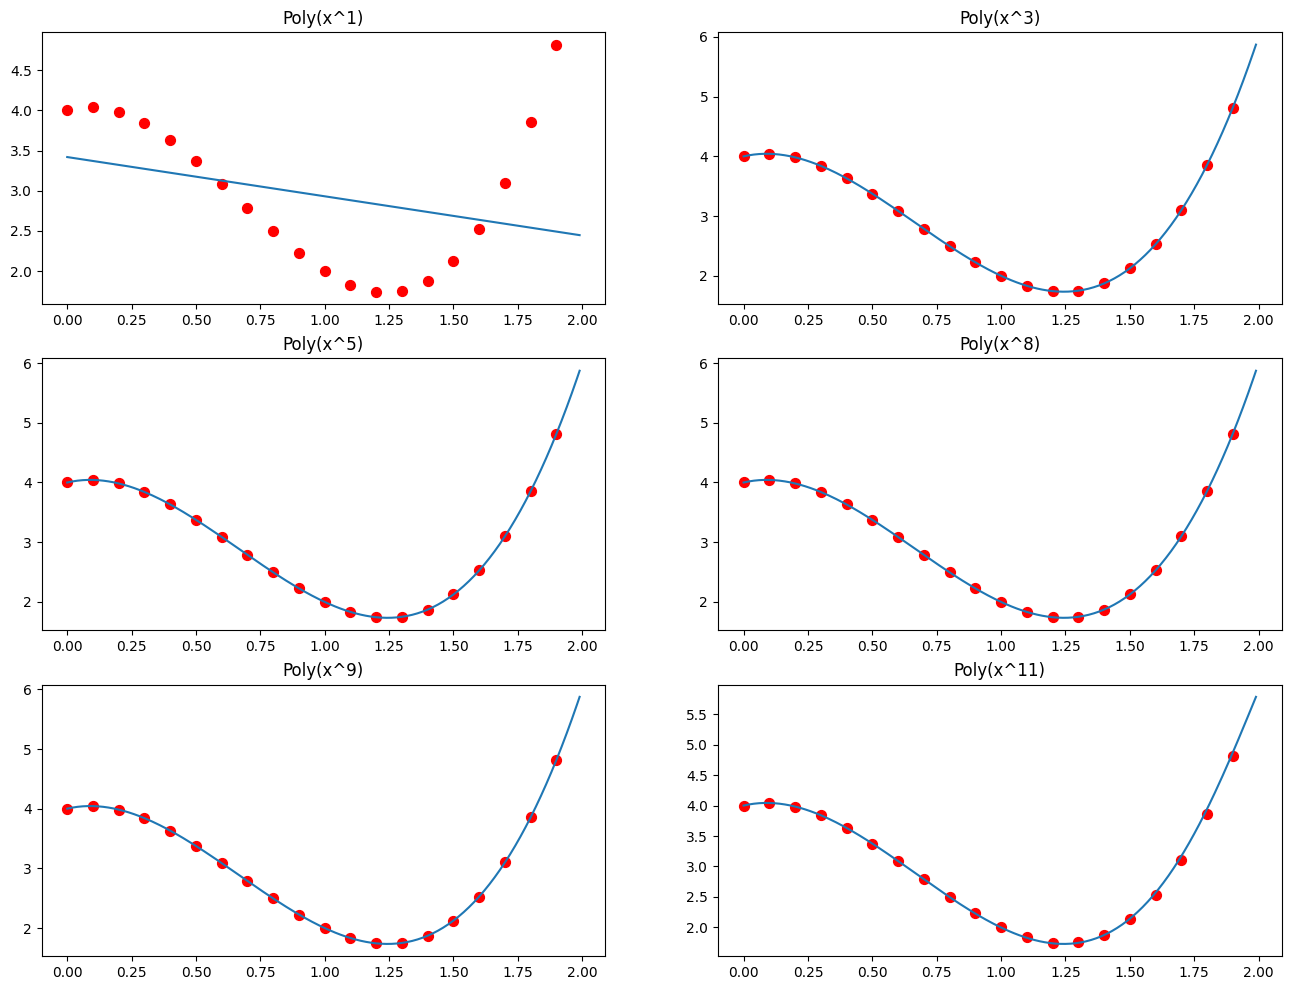

In [ ]:
'''
Now let's try higher orders.
How high can ve go.
'''
w_real = np.array([3, -6, 1, 4])

x_rg = np.arange(0, 2, .1).reshape(-1, 1)
y_rg = np.dot(poly_features(x_rg, len(w_real)-1), w_real).reshape(-1, 1)

# for the plot
x_range = np.arange(0, 2, .01).reshape(-1, 1)
fig = plt.figure(figsize=(16, 12))

deg_list = [1, 3, 5, 8, 9, 11]
ind = 0
for deg in deg_list:
    ind += 1
    # Make the X matrix with powers of the x
    x_rg_in = poly_features(x_rg, deg)

    # Construct m as X^T.X
    m = np.dot(x_rg_in.T, x_rg_in)

    # This gives the w
    w = np.dot(np.linalg.inv(m), np.dot(x_rg_in.T, y_rg))

    # Add the plot
    y_rg_list = np.dot(poly_features(x_range, deg), w)

    ax = fig.add_subplot(3, 2, ind, title=f'Poly(x^{deg})')
    ax.scatter(x_rg, y_rg, s=50, c ='r')
    ax.plot(x_range, y_rg_list)

In [ ]:
print(w)
print(w_real)

[[-1.55639648e-03]
 [-5.61523438e-03]
 [ 3.51562500e-02]
 [-4.68750000e-02]
 [ 3.12500000e-02]
 [-1.56250000e-02]
 [-7.81250000e-03]
 [ 5.85937500e-03]
 [ 2.99804688e+00]
 [-5.99963379e+00]
 [ 9.99977112e-01]
 [ 4.00000001e+00]]
[ 3 -6  1  4]


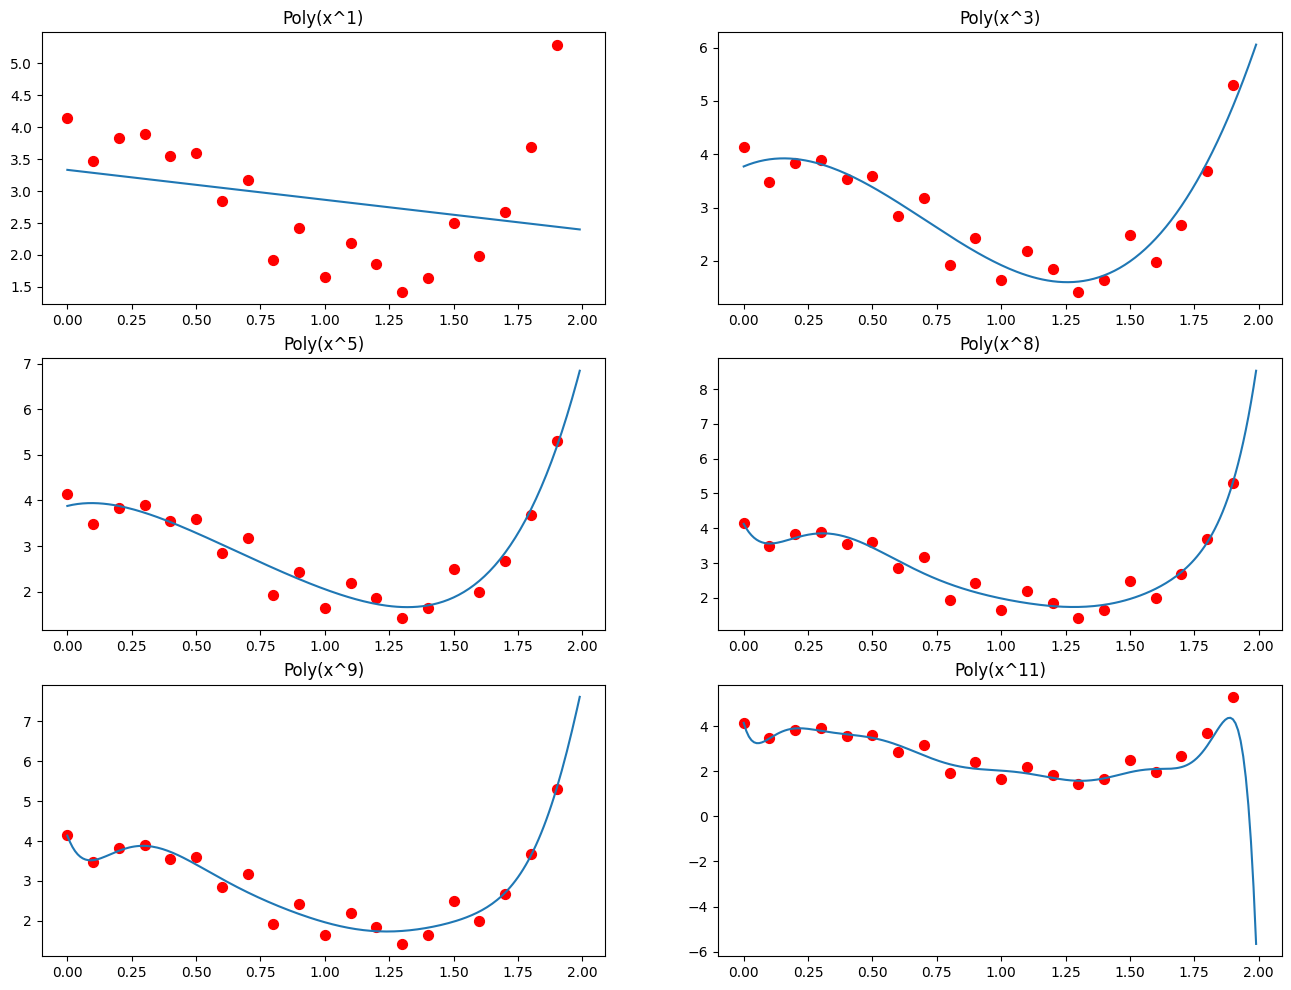

In [ ]:
'''
Polynomial Regression whith Noise
'''
w_real = np.array([3, -6, 1, 4])

x_rg = np.arange(0, 2, .1).reshape(-1, 1)
y_rg = np.dot(poly_features(x_rg, len(w_real)-1), w_real).reshape(-1, 1)

# Let's add some noise:
y_rg = y_rg + np.random.normal(0, .3, len(y_rg)).reshape(-1, 1)

# for the plot
x_range = np.arange(0,2, .01).reshape(-1, 1)
fig = plt.figure(figsize=(16, 12))


deg_list = [1, 3, 5, 8, 9, 11]
ind = 0
for deg in deg_list:
    ind += 1
    # Make the X matrix with powers of the x
    x_rg_in = poly_features(x_rg, deg)

    # Construct m as X^T.X
    m = np.dot(x_rg_in.T, x_rg_in)

    # This gives the w
    w = np.dot(np.linalg.inv(m), np.dot(x_rg_in.T, y_rg))

    ## Add the plot
    y_rg_list = np.dot(poly_features(x_range, deg), w)

    ax = fig.add_subplot(3, 2, ind, title=f'Poly(x^{deg})')
    ax.scatter(x_rg, y_rg, s=50, c='r')
    ax.plot(x_range, y_rg_list)

Polynomial coefficients: [  0.11666667  -1.54166667   7.16666667 -13.45833333   8.71666667
   1.        ]


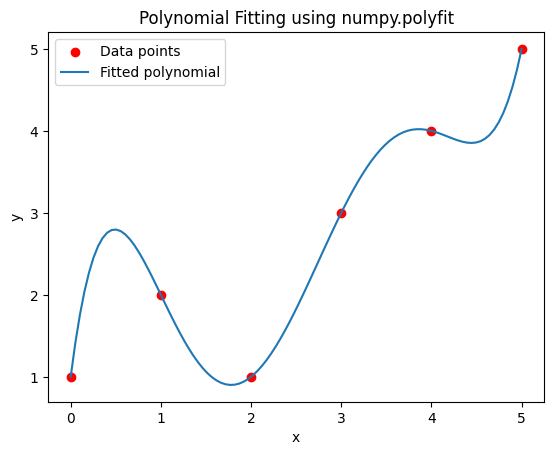

In [ ]:
# Sample data points
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([1, 2, 1, 3, 4, 5])

# Fit a polynomial of degree 2 to the data
coefficients = np.polyfit(x, y, 5)

# Print the coefficients
print("Polynomial coefficients:", coefficients)

# Create a polynomial function using the coefficients
poly_func = np.poly1d(coefficients)

# Generate points to plot the fitted polynomial
x_fit = np.linspace(0, 5, 100)
y_fit = poly_func(x_fit)

# Plot the original data points and the fitted polynomial
plt.scatter(x, y, color='red', label='Data points')
plt.plot(x_fit, y_fit, label='Fitted polynomial')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Fitting using numpy.polyfit')
plt.show()

# Logistic regression

In [ ]:
# Generate synthetic one-dimensional data
np.random.seed(0)
X = np.random.randn(100, 1)  # 100 samples with 1 feature
y = (X.ravel() > 0).astype(int)  # Binary classification based on the feature value

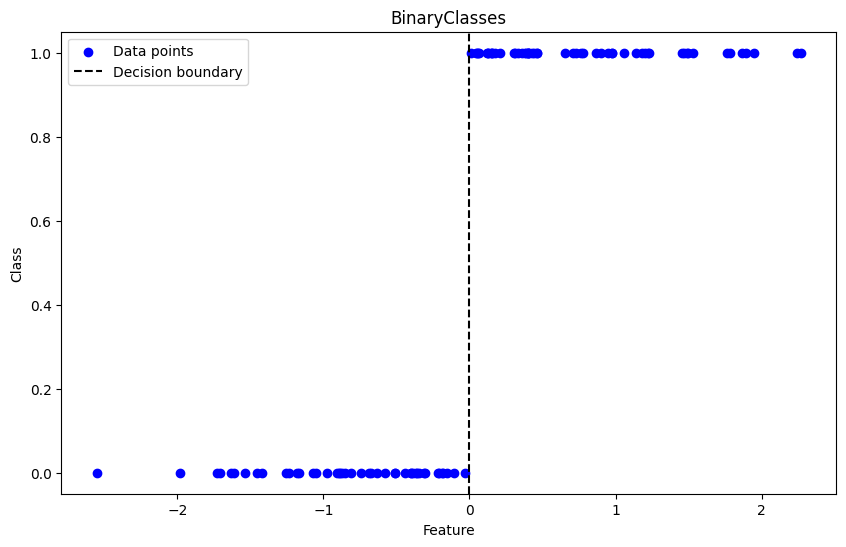

In [ ]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.axvline(x=0, color='black', linestyle='--', label='Decision boundary')
plt.xlabel('Feature')
plt.ylabel('Class')
plt.title('BinaryClasses')
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)

NameError: name 'X' is not defined

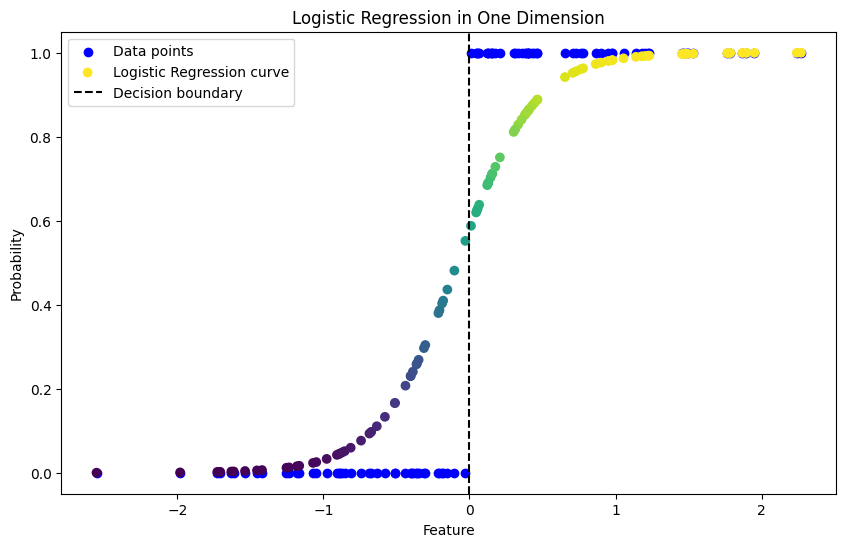

In [ ]:
# Plot the data and the decision boundary
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
p = model.predict_proba(X)[:, 1]
plt.scatter(X, p, c=p, label='Logistic Regression curve')
plt.axvline(x=0, color='black', linestyle='--', label='Decision boundary')
plt.xlabel('Feature')
plt.ylabel('Probability')
plt.title('Logistic Regression in One Dimension')
plt.legend()
plt.show()

In [ ]:
# Generate 2D synthetic data
np.random.seed(0)
X = np.random.randn(100, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int)

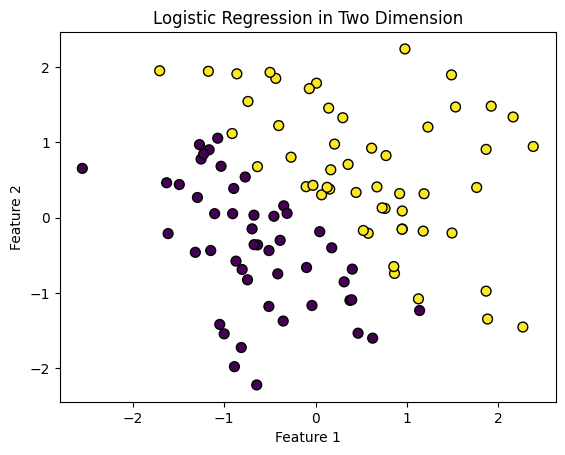

In [ ]:
# Plot the data

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression in Two Dimension')
plt.show()

In [ ]:
# Initialize and train the model
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

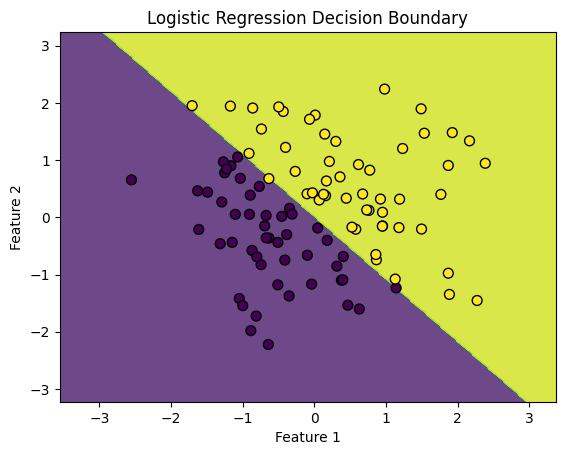

In [ ]:
# Plot the decision boundary
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()

Accuracy: 100.00%


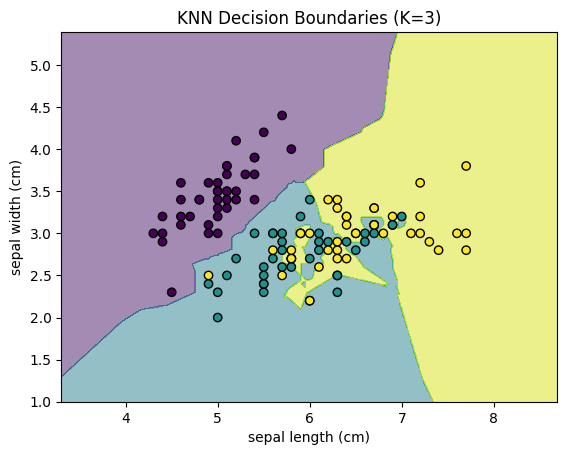

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier with K=3
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Predict classes for the testing set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Visualize decision boundary (only for 2 features for simplicity)
def plot_decision_boundaries(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.title(f'KNN Decision Boundaries (K={k})')
    plt.show()

# For visualization, we'll use only the first two features
X_train_2D = X_train[:, :2]
X_test_2D = X_test[:, :2]
knn_2D = KNeighborsClassifier(n_neighbors=k).fit(X_train_2D, y_train)
plot_decision_boundaries(X_train_2D, y_train, knn_2D)